### Importing all the libraries

In [42]:
import os
from keras.models import Sequential
from keras.preprocessing.image import load_img, img_to_array
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

### Getting all the images from the folder; normalising & converting it to np.array()

In [60]:
img_dir = './Train'
img_paths = [os.path.join(img_dir, f) for f in os.listdir(img_dir) if f.endswith('.png')]

In [54]:
images = []
for img_path in img_paths:
    img = load_img(img_path, target_size=(32, 32))
    img = img_to_array(img)
    img /= 255.0
    images.append(img)

In [55]:
images = np.array(images)
labels = np.array([1 for x in range(len(images))])

### The DL stuff

In [56]:
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

In [57]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
history = model.fit(train_images, train_labels, epochs=100, batch_size=32, validation_data=(val_images, val_labels))

Epoch 1/100
1/1 [==============================] - 1s 677ms/step - loss: 0.9254 - accuracy: 0.0000e+00 - val_loss: 0.2053 - val_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 54ms/step - loss: 0.1238 - accuracy: 1.0000 - val_loss: 0.0916 - val_accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 71ms/step - loss: 0.0428 - accuracy: 1.0000 - val_loss: 0.0516 - val_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 74ms/step - loss: 0.0172 - accuracy: 1.0000 - val_loss: 0.0324 - val_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 50ms/step - loss: 0.0136 - accuracy: 1.0000 - val_loss: 0.0213 - val_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 52ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 35ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 8/100
1/1

Epoch 57/100
1/1 [==============================] - 0s 32ms/step - loss: 1.3335e-06 - accuracy: 1.0000 - val_loss: 8.8189e-06 - val_accuracy: 1.0000
Epoch 58/100
1/1 [==============================] - 0s 34ms/step - loss: 2.4101e-05 - accuracy: 1.0000 - val_loss: 8.6055e-06 - val_accuracy: 1.0000
Epoch 59/100
1/1 [==============================] - 0s 35ms/step - loss: 2.9688e-05 - accuracy: 1.0000 - val_loss: 8.3845e-06 - val_accuracy: 1.0000
Epoch 60/100
1/1 [==============================] - 0s 36ms/step - loss: 3.3766e-06 - accuracy: 1.0000 - val_loss: 8.1836e-06 - val_accuracy: 1.0000
Epoch 61/100
1/1 [==============================] - 0s 34ms/step - loss: 1.7956e-05 - accuracy: 1.0000 - val_loss: 7.9847e-06 - val_accuracy: 1.0000
Epoch 62/100
1/1 [==============================] - 0s 40ms/step - loss: 7.4005e-06 - accuracy: 1.0000 - val_loss: 7.7987e-06 - val_accuracy: 1.0000
Epoch 63/100
1/1 [==============================] - 0s 36ms/step - loss: 4.5033e-06 - accuracy: 1.0000 - v

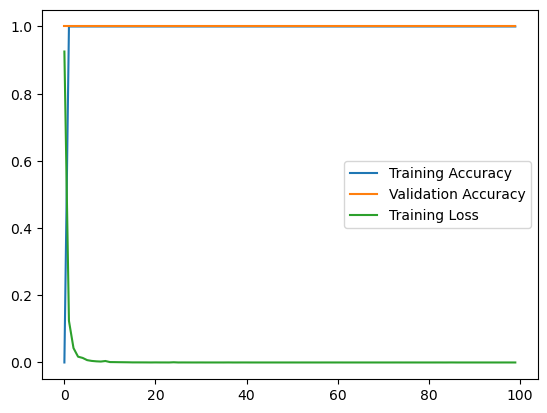

In [59]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.legend()
plt.show()

In [52]:
test_loss, test_acc = model.evaluate(train_images, train_labels)
print('Test accuracy:', test_acc)

3/3 [==============================] - 0s 4ms/step - loss: 8.8803e-12 - accuracy: 1.0000
Test accuracy: 1.0
